# Import Libraries

In [1]:
!pip install keras==2.3.1

     |████████████████████████████████| 377 kB 593 kB/s 
     |████████████████████████████████| 50 kB 4.6 MB/s 


In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import save_model

2021-10-01 16:31:35.502634: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-01 16:31:35.502771: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Using TensorFlow backend.


In [3]:
#import the csv file
dataset = pd.read_csv('../input/featuresbart-homer/features.csv')

In [4]:
#Extract X and Y
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

# Train Test Split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

# Build Model

In [6]:
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape = (6,), units = 4, activation='relu'))
network1.add(tf.keras.layers.Dense(units = 4, activation='relu'))
network1.add(tf.keras.layers.Dense(units = 4, activation='relu'))
network1.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

2021-10-01 16:31:41.162152: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 16:31:41.165803: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-01 16:31:41.165843: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-01 16:31:41.165869: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (f676da44419c): /proc/driver/nvidia/version does not exist
2021-10-01 16:31:41.167088: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

# Visualise Model

In [7]:
network1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 28        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


# Train Model

In [8]:
#compile
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics =['accuracy'])

#train
history = network1.fit(X_train, Y_train, epochs = 50)

2021-10-01 16:31:41.727563: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-01 16:31:41.745449: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/50
7/7 [==============================] - 1s 2ms/step - loss: 0.5655 - accuracy: 0.6222
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.6075
Epoch 3/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5337 - accuracy: 0.6375
Epoch 4/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.6185
Epoch 5/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.6443
Epoch 6/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5175 - accuracy: 0.6436
Epoch 7/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5389 - accuracy: 0.6344
Epoch 8/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.6641
Epoch 9/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.6592
Epoch 10/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.6994
Epoch 11/50
7/7 [======================

# Evaluate

Accuracy : 87.03703703703704
              precision    recall  f1-score   support

           0       0.96      0.79      0.86        28
           1       0.81      0.96      0.88        26

    accuracy                           0.87        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.88      0.87      0.87        54



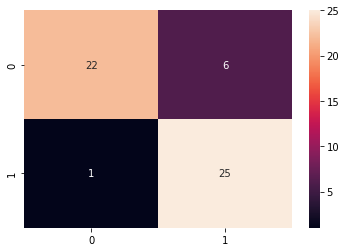

In [9]:
predictions = network1.predict(X_test)
predictions = predictions > 0.5 #threshold
print('Accuracy :', accuracy_score(Y_test, predictions)*100)
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True);
print(classification_report(Y_test, predictions))

# Save Model & Weights

In [10]:
#save json model structure
model_json = network1.to_json() #convert model structure to json format
with open('network1.json', 'w') as json_file:
  json_file.write(model_json) #write model structure in json format to disk

#save model weights
network1_saved = tf.keras.models.save_model(network1, './weights1.hdf5')

In [11]:
#read stored json model structure
with open('network1.json', 'r') as json_file:
  json_saved_model = json_file.read() #load saved model structure from json file

#build model from json structure
network1_loaded = tf.keras.models.model_from_json(json_saved_model) #convert model structure to model
network1_loaded.load_weights('weights1.hdf5') #load model weights
network1_loaded.compile(optimizer='Adam', loss='binary_crossentropy', metrics =['accuracy']) #same as when trained

In [12]:
#model summary
network1_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 28        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


# Single Image Prediction

In [13]:
test_image = X_test[0]
test_image = test_image.reshape(1, -1)
print(network1_loaded.predict(test_image)[0][0]) 
if(network1_loaded.predict(test_image)[0][0] < 0.5):
  print('Bart')
else:
  print('Homer')

1.37547e-05
Bart
